-----------
Initializing structure...
time for choose_chunkdivision = 0.000180006 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (100,100,100)
     cylinder, center = (-1,-1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,-1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
time for set_epsilon = 0.117689 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 642.9250000000001/2000.0 = 32.1% done in 4.0s, 8.4s to go
on time step 25739 (time=643.475), 0.00015541 s/step
Meep progress: 1289.15/2000.0 = 64.5% done in 8.0s, 4.4s to go
on time step 51599 (time=1289.98), 0.0001547 s/step
Meep progress: 1936.4250000000002/2000.0 = 96.8% done in 12.0s, 0.4s to go
on time step 77500 (time=1937.5), 0.000154439 s/step
run 0 finished at t = 2000.0 (80000 timesteps)
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (100,100,100)
     cylinder, center = (-1,-1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1,1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,-1,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diago

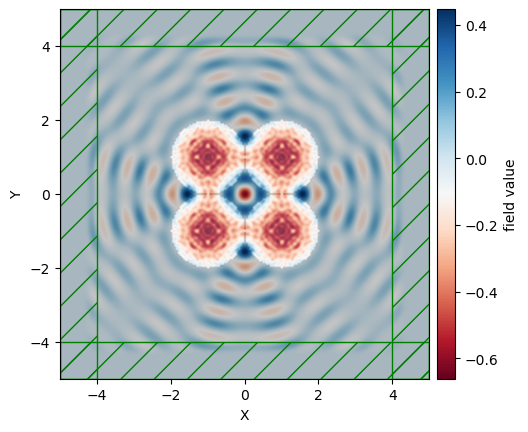

In [4]:
##四圓柱
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(10, 10, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 介電背景
block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.Medium(index=10)
)

# 圓柱
cylinder_1 = mp.Cylinder(
    radius=1,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1, -1)        
)
cylinder_2 = mp.Cylinder(
    radius=1,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1, 1)        
)
cylinder_3 = mp.Cylinder(
    radius=1,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1, -1)        
)
cylinder_4 = mp.Cylinder(
    radius=1,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1, 1)        
)

# 幾何結構
geometry = [block, cylinder_1, cylinder_2, cylinder_3, cylinder_4]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1, -1)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1, 1)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1, -1)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1, 1)
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=2000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap': 'RdBu'},
           source_parameters={'alpha': 0})
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000576019 s
Working in 2D dimensions.
Computational cell is 20 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (20,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (100,100,100)
     cylinder, center = (-1,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-2,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (2,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-3,0,0)
          radius 0.5, height 1e+20, axis (0,

FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 171.97500000000002/2000.0 = 8.6% done in 4.0s, 42.5s to go
on time step 6887 (time=172.175), 0.000580818 s/step
Meep progress: 388.07500000000005/2000.0 = 19.4% done in 8.0s, 33.2s to go
on time step 15536 (time=388.4), 0.000462577 s/step
Meep progress: 636.075/2000.0 = 31.8% done in 12.0s, 25.7s to go
on time step 25462 (time=636.55), 0.000402986 s/step
Meep progress: 885.725/2000.0 = 44.3% done in 16.0s, 20.1s to go
on time step 35455 (time=886.375), 0.000400299 s/step
Meep progress: 1134.9/2000.0 = 56.7% done in 20.0s, 15.2s to go
on time step 45427 (time=1135.67), 0.000401146 s/step
Meep progress: 1384.3500000000001/2000.0 = 69.2% done in 24.0s, 10.7s to go
on time step 55410 (time=1385.25), 0.000400721 s/step
Meep progress: 1633.65/2000.0 = 81.7% done in 28.0s, 6.3s to go
on time step 65385 (time=1634.62), 0.000401045 s/step
Meep progress: 1882.95/2000.0 = 94.1% done in 32.0s, 2.0s to go
on time step 75363 (time=1884.08), 0.000400906 s/step
run 0 finished at t = 200

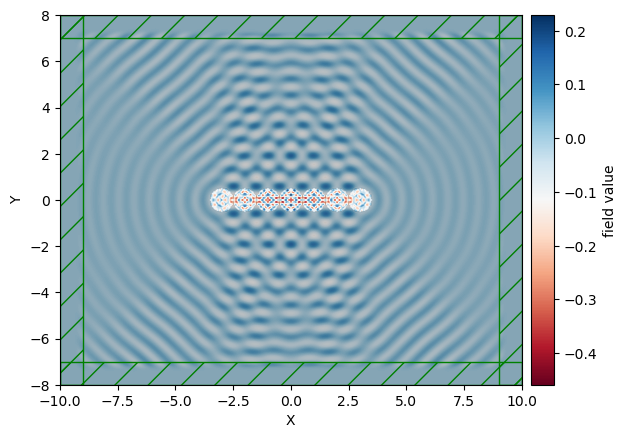

In [3]:
##橫向排列圓柱
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(20, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 介電背景
block = mp.Block(
    size=mp.Vector3(20, 16, mp.inf),
    material=mp.Medium(index=10)
)

# 圓柱
cylinder_1 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1, 0)        
)
cylinder_2 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1, 0)        
)
cylinder_3 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-2, 0)        
)
cylinder_4 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(2, 0)        
)
cylinder_5 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-3, 0)        
)
cylinder_6 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(3, 0)        
)
cylinder_7 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0)        
)

# 幾何結構
geometry = [block, cylinder_1, cylinder_2, cylinder_3, cylinder_4, cylinder_5, cylinder_6, cylinder_7]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-3, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-2, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(2, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(3, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, 0)
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=2000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap': 'RdBu'},
           source_parameters={'alpha': 0})
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000545025 s
Working in 2D dimensions.
Computational cell is 20 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (20,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (100,100,100)
     cylinder, center = (-0.5,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0.5,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1.5,0,0)
          radius 0.25, height 1e+2

FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 170.125/2000.0 = 8.5% done in 4.0s, 43.0s to go
on time step 6815 (time=170.375), 0.000586991 s/step
Meep progress: 383.975/2000.0 = 19.2% done in 8.0s, 33.7s to go
on time step 15380 (time=384.5), 0.000467028 s/step
Meep progress: 631.825/2000.0 = 31.6% done in 12.0s, 26.0s to go
on time step 25298 (time=632.45), 0.000403323 s/step
Meep progress: 877.75/2000.0 = 43.9% done in 16.0s, 20.5s to go
on time step 35139 (time=878.475), 0.000406483 s/step
Meep progress: 1124.2/2000.0 = 56.2% done in 20.0s, 15.6s to go
on time step 45001 (time=1125.03), 0.000405609 s/step
Meep progress: 1330.025/2000.0 = 66.5% done in 24.0s, 12.1s to go
on time step 53236 (time=1330.9), 0.000485773 s/step
Meep progress: 1577.2/2000.0 = 78.9% done in 28.0s, 7.5s to go
on time step 63125 (time=1578.12), 0.000404553 s/step
Meep progress: 1824.5500000000002/2000.0 = 91.2% done in 32.0s, 3.1s to go
on time step 73026 (time=1825.65), 0.00040402 s/step
run 0 finished at t = 2000.0 (80000 timesteps)
   

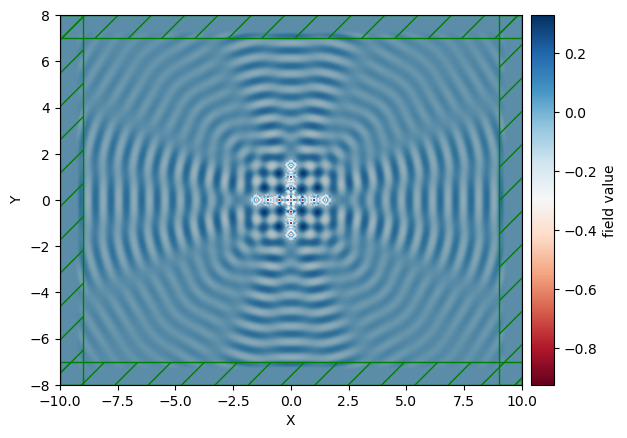

In [8]:
##十字圓柱
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(20, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 介電背景
block = mp.Block(
    size=mp.Vector3(20, 16, mp.inf),
    material=mp.Medium(index=10)
)

# 圓柱
cylinder_1 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-0.5, 0)        
)
cylinder_2 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0.5, 0)        
)
cylinder_3 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1, 0)        
)
cylinder_4 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1, 0)        
)
cylinder_5 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1.5, 0)        
)
cylinder_6 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1.5, 0)        
)
cylinder_7 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0)        
)
cylinder_8 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, -0.5)        
)
cylinder_9 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0.5)        
)
cylinder_10 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, -1)        
)
cylinder_11 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 1)        
)
cylinder_12 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, -1.5)        
)
cylinder_13 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 1.5)        
)

# 幾何結構
geometry = [block, cylinder_1, cylinder_2, cylinder_3, cylinder_4, cylinder_5, cylinder_6, cylinder_7, cylinder_8, cylinder_9, cylinder_10, cylinder_11, cylinder_12, cylinder_13]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1.5, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-0.5, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0.5, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1.5, 0)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, -1.5)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, -1)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, -0.5)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, 0.5)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, 1)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, 1.5)
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=2000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap': 'RdBu'},
           source_parameters={'alpha': 0})
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000705957 s
Working in 2D dimensions.
Computational cell is 50 x 50 x 0 with resolution 20
     cylinder, center = (-1.73205,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1.73205,0,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,1.73205,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,-1.73205,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1.22474,1.22474,0)
          radius 0.25, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1.22474,-1.22474,0)
   

FloatProgress(value=0.0, description='0% done ', max=2000.0)

Meep progress: 26.35/2000.0 = 1.3% done in 4.0s, 299.8s to go
on time step 1055 (time=26.375), 0.00379162 s/step
Meep progress: 54.300000000000004/2000.0 = 2.7% done in 8.0s, 286.8s to go
on time step 2174 (time=54.35), 0.00357727 s/step
Meep progress: 80.10000000000001/2000.0 = 4.0% done in 12.0s, 287.7s to go
on time step 3206 (time=80.15), 0.00387737 s/step
Meep progress: 106.35000000000001/2000.0 = 5.3% done in 16.0s, 285.0s to go
on time step 4257 (time=106.425), 0.00380807 s/step
Meep progress: 132.675/2000.0 = 6.6% done in 20.0s, 281.6s to go
on time step 5311 (time=132.775), 0.00379609 s/step
Meep progress: 159.05/2000.0 = 8.0% done in 24.0s, 277.9s to go
on time step 6365 (time=159.125), 0.00379581 s/step
Meep progress: 190.35000000000002/2000.0 = 9.5% done in 28.0s, 266.3s to go
on time step 7619 (time=190.475), 0.00319208 s/step
Meep progress: 223.65/2000.0 = 11.2% done in 32.0s, 254.3s to go
on time step 8951 (time=223.775), 0.00300529 s/step
Meep progress: 258.0/2000.0 = 1

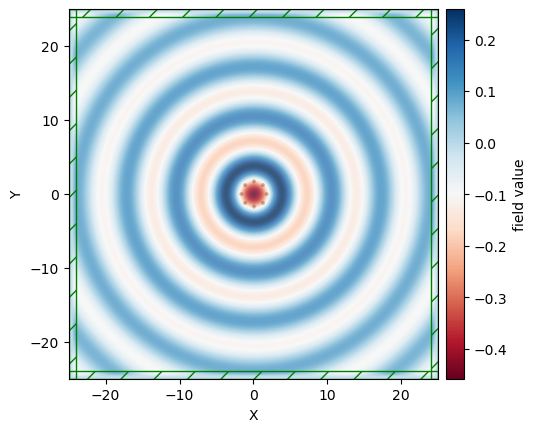

In [1]:
##環狀圓柱
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(50, 50, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 建立橢圓物件
cylinder_1 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1.73205, 0)        
)
cylinder_2 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1.73205, 0)        
)
cylinder_3 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 1.73205)      
)
cylinder_4 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, -1.73205)      
)
cylinder_5 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1.22474, 1.22474)        
)
cylinder_6 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1.22474, -1.22474)         
)
cylinder_7 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1.22474, -1.22474)      
)
cylinder_8 = mp.Cylinder(
    radius=0.25,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1.22474, 1.22474)       
)
# 將結構放入模擬場域
geometry = [cylinder_1, cylinder_2, cylinder_3, cylinder_4, cylinder_5, cylinder_6, cylinder_7, cylinder_8]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1.73205, 0) 
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1.73205, 0)   
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, 1.73205)  
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(0, -1.73205)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1.22474, 1.22474)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1.22474, -1.22474) 
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(-1.22474, -1.22474)
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=mp.Vector3(1.22474, 1.22474)
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=2000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True},
           source_parameters={'alpha': 0})
plt.show()
